In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [7]:
missing_values = df.isna().sum()
print (missing_values)

df = df.dropna()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [8]:
class_counts = df.groupby('Class').size()
print(class_counts)

Class
Besni      450
Kecimen    450
dtype: int64


In [9]:
target = df.Class

In [10]:
target_encoding = pd.get_dummies(target)

In [11]:
target_encoding

,Besni,Kecimen
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
895,True,False
896,True,False
897,True,False
898,True,False


In [12]:
x = df.drop(columns=['Class']).values
y = target_encoding

In [13]:
x.shape

(900, 7)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(7, input_shape=(7,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(lr=0.02), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 2)                 16        
                                                                 
Total params: 184 (736.00 Byte)
Trainable params: 184 (736.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 1365.6947 - accuracy: 0.5153 - val_loss: 648.1227 - val_accuracy: 0.5500
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 611.6149 - accuracy: 0.4833 - val_loss: 341.0285 - val_accuracy: 0.5500
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 248.9831 - accuracy: 0.4750 - val_loss: 68.1043 - val_accuracy: 0.4389
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 88.4410 - accuracy: 0.4347 - val_loss: 62.9008 - val_accuracy: 0.4611
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 86.9919 - accuracy: 0.4653 - val_loss: 73.4247 - val_accuracy: 0.4889
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 92.1284 - accuracy: 0.4694 - val_loss: 67.6871 - val_accuracy: 0.4833
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 86.9437 - accuracy: 0.4792 - val_loss: 96.7577 - val_accuracy: 

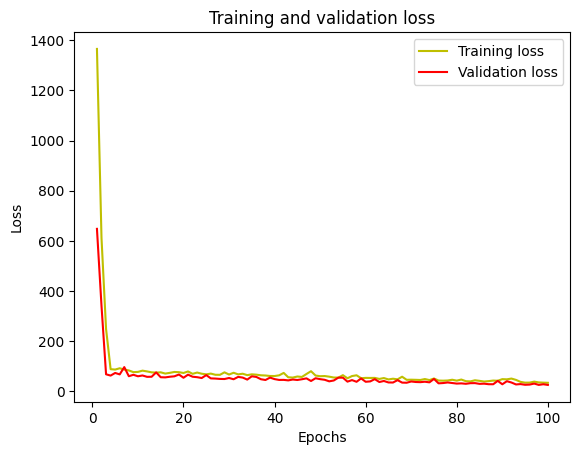

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

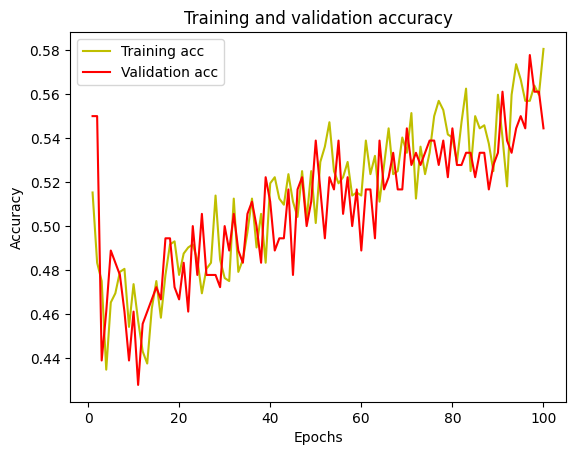

In [18]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.57      0.73      0.64        99
           1       0.49      0.32      0.39        81

    accuracy                           0.54       180
   macro avg       0.53      0.52      0.51       180
weighted avg       0.53      0.54      0.53       180

[[72 27]
 [55 26]]
